In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips=sns.load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# What are the weekdays are present in dataset?

In [4]:
tips.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

# How many dinners and lunch present in data?

Dinner    176
Lunch      68
Name: time, dtype: int64


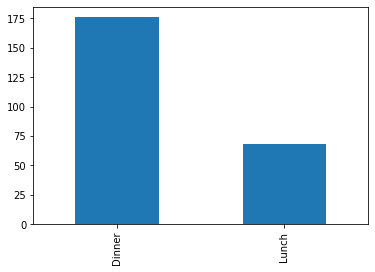

In [11]:
print(tips.time.value_counts())
tips.time.value_counts().plot(kind='bar')

# To Find Proportion

In [7]:
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

# When dose People give more tip?

In [20]:
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

# Who pays more average tip smoker or nonsmoker?

In [22]:
tips.groupby(['sex','smoker'])['tip'].mean()

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

In [23]:
# Now to make more pivot structure 


In [24]:
tips.groupby(['sex','smoker'])['tip'].mean().unstack()

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

# Creating new column to find out % of tip to total bill

In [30]:
tips['tips_pact']=(tips.tip/tips.total_bill)*100
tips.tips_pact

0       5.944673
1      16.054159
2      16.658734
3      13.978041
4      14.680765
         ...    
239    20.392697
240     7.358352
241     8.822232
242     9.820426
243    15.974441
Name: tips_pact, Length: 244, dtype: float64

# Now creating column for saying good tip or okay tip by setting threhold 20% as its ideal in USA.

In [34]:
import numpy as np
tips['tip_type']=np.where(tips['tips_pact'] >=20,'Good','okay')
tips

,total_bill,tip,sex,smoker,day,time,size,tips_pact,tip_type
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,okay
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,okay
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,okay
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,okay
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,okay
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697,Good
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352,okay
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232,okay
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426,okay


In [33]:
pd.crosstab(tips['sex'],tips['tip_type'])

tip_type,Good,okay
sex,,
Male,24,133
Female,15,72


# Visualizing using Seaborn library.

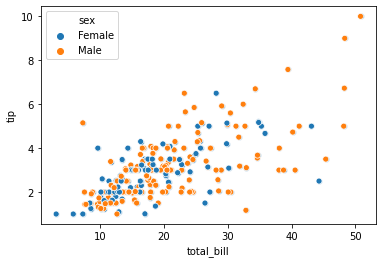

In [39]:
sns.scatterplot(x='total_bill',y='tip',data=tips)
## can also add male vs female using hue
sns.scatterplot(x='total_bill',y='tip',hue='sex',data=tips);

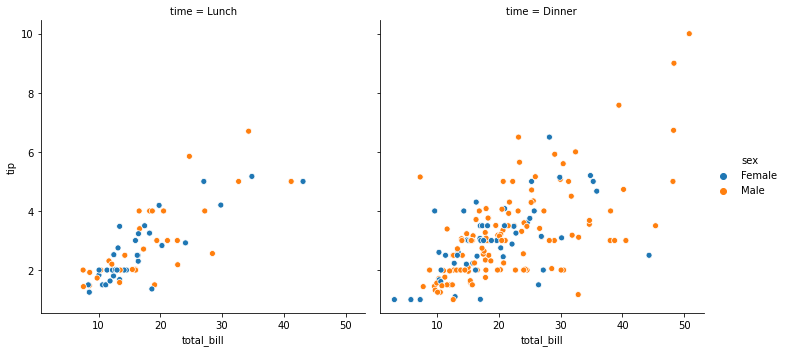

In [43]:
# For more granularity 
sns.relplot(x='total_bill',y='tip',col='time',hue='sex',data=tips)

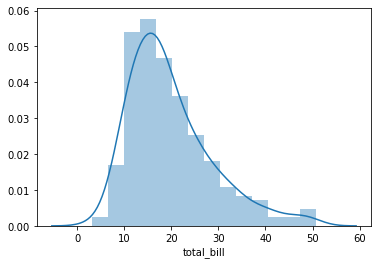

In [56]:
# Now Analyzing total_bill distribution in dinner and lunch
sns.distplot(tips['total_bill'])


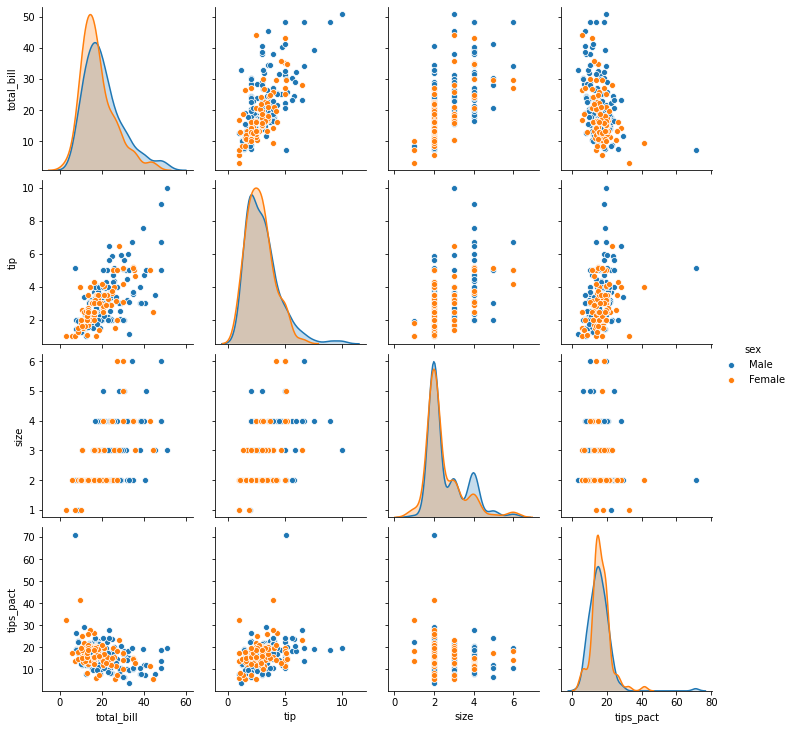

In [58]:
#Finnding corelation with each column
sns.pairplot(tips,hue='sex')